In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Decision Tree\HR-Employee-Attrition.csv")
pd.set_option('display.max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## BASIC CHECKS

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Here two columns(Employ_count,Standard_Hours) have std==0 so ,it means they have unique values it means they are not able to use in analysis.

In [ ]:
data.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


* HERE IN OVER18 COLUMN WE ONLY HAVE 1 UNIQUE VALUE SO IT MEANS NO ANALYSIS DONE ON IT.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# BI-VARIATE ANALYSIS

### CREATING NEW DATA FRAME OF CATAGORICAL COLUMNS

In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [ ]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
data1=data[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]

## ANALYSIS ON CATAGORICAL COLUMNS W.R.T TARGET COLUMN(ATTRITION)

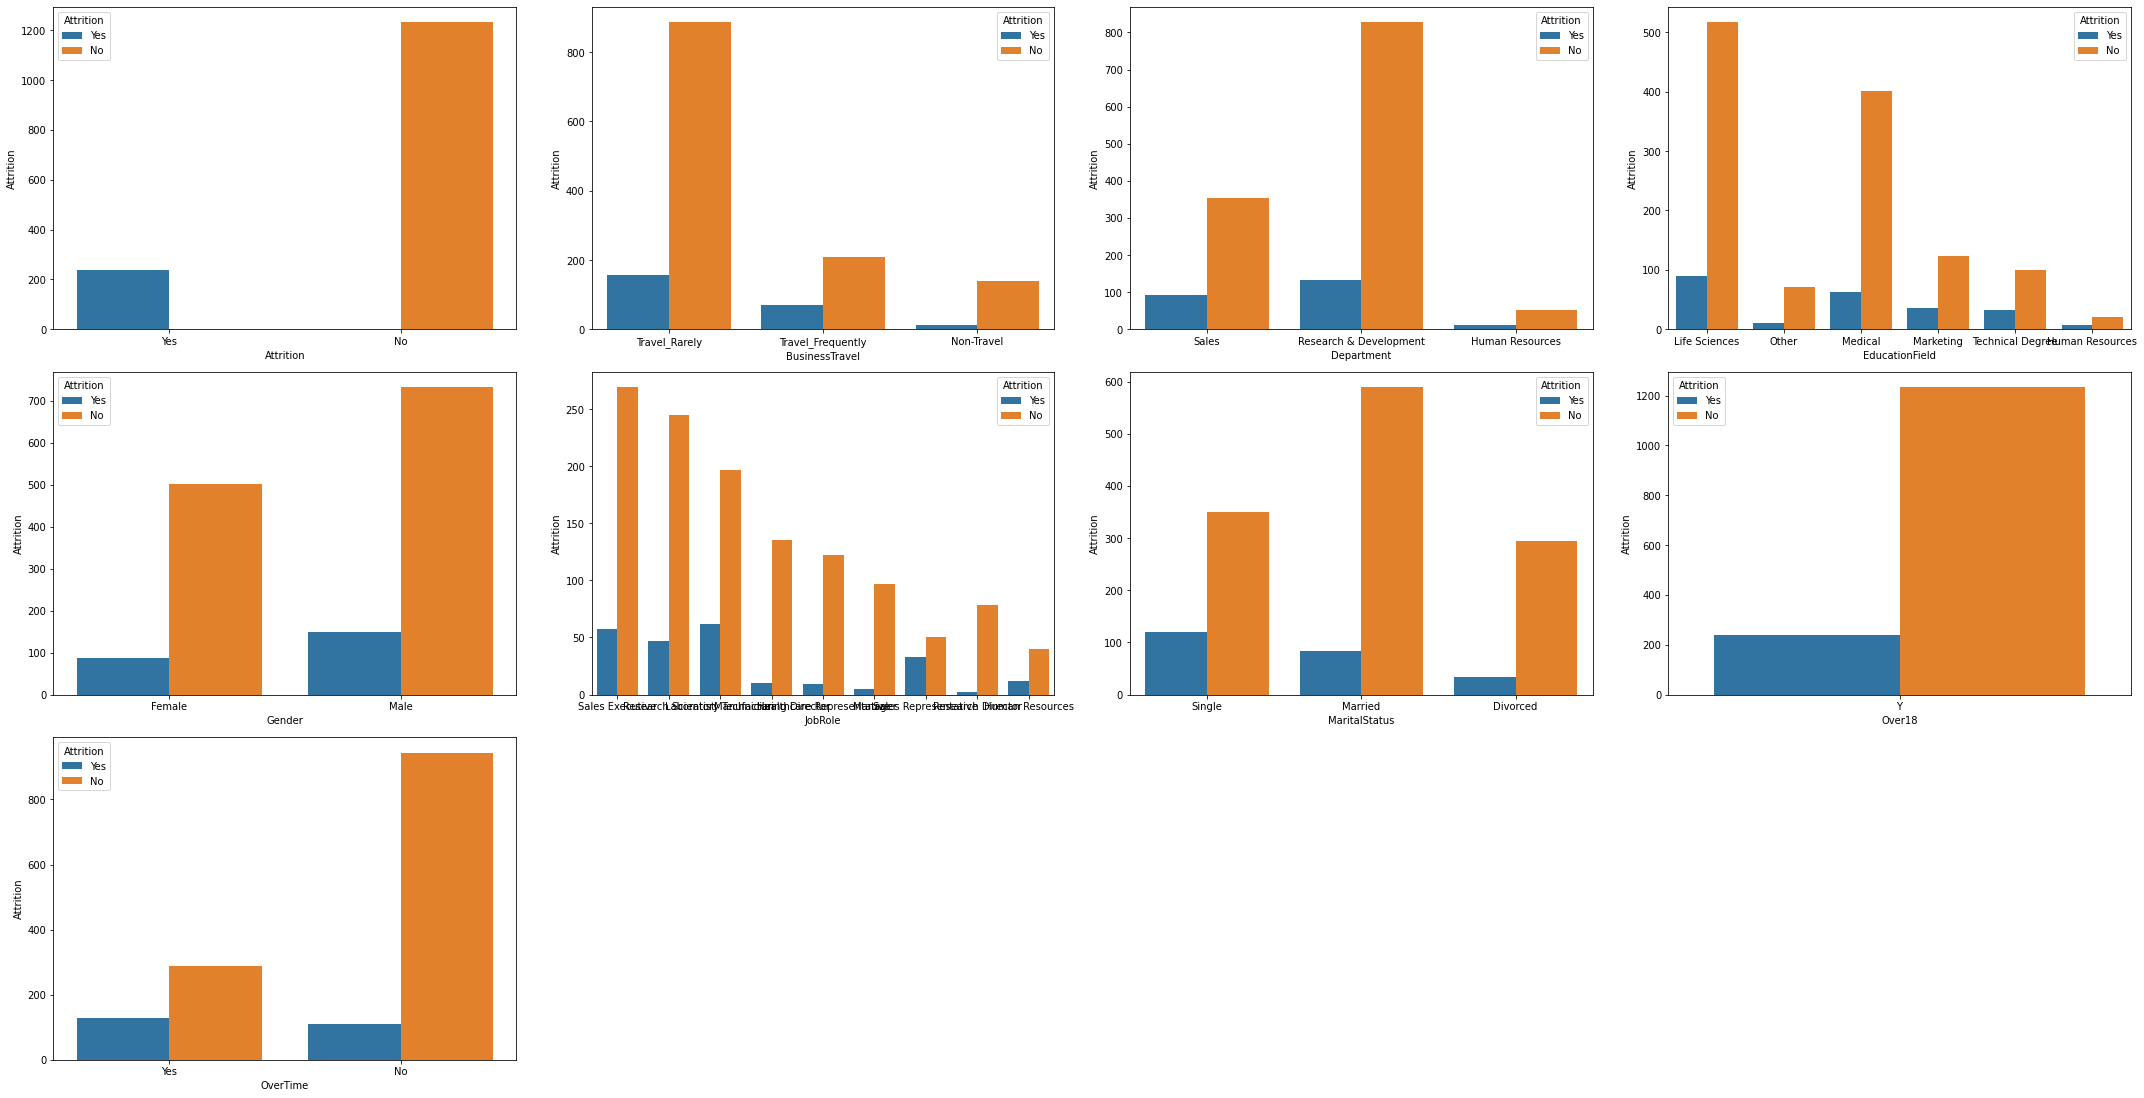

In [ ]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data1[column].dropna(axis=0),hue=data.Attrition)
        plt.xlabel(column)
        plt.ylabel('Attrition')
    plotnumber+=1
plt.tight_layout()

### TARGET COLUMN ==  ATTRITION

* Data of Attrition says that it has more number of " No " values and less number of " Yes ".
* It can be seen that there is big difference in counts of the values so we can say that it is IMBALANCE DATA.

### 1. IMPACT OF BUSINESS TRAVEL ON ATTRITION

* Graph tells us that company has more count or more no. of employes who travels rarely. It means travel rate of company is less.
* There are more employes which  travels rarely and are not satisfied with their job.
* Non - traveller have least count as well as least attrition.

### 2. IMPACT OF DEPARTMENT ON ATTRITION

* There are 3 no. of department are there --> 1. Sales , 2.Research and Development , 3. HR department
* "Research and Development" department have more number of Attrition(150 employees) as compared to other two department.
* "HR Department" have least Attrition with just 5 to 10 employees.

### 3. IMPACT OF EDUCATION FIELD ON ATTRITION

* First and foremost thing is that Employees who are from " Life Science " and " Medical " backgrounds are more as compared to other edication fields.
* Nearly 100 number of employees are there who are from Life Science education background will leave the company   and followed by Medical education Employees.
* As we conclude from analysis of Department and Attrition , here also HR educational background employees have least Attrition.

### 4. GENDER AND ATTRITION

* Male employees are more as compared to Females
* Males are more likely to quit the job rather than Females.


### 5. OVERTIME AND ATTRITION

* As for " Attrition yes " , there is minor difference between the  Employees who are doing overtime and who are not doing overtime.
* So we can say that Overtime feature is not much Attrition.
* But we can conclude that most of employees are not doing overtime.

### 6. IMPACT OF JOB ROLE ON ATTRITION

Text(0.5, 0, 'JobRole')

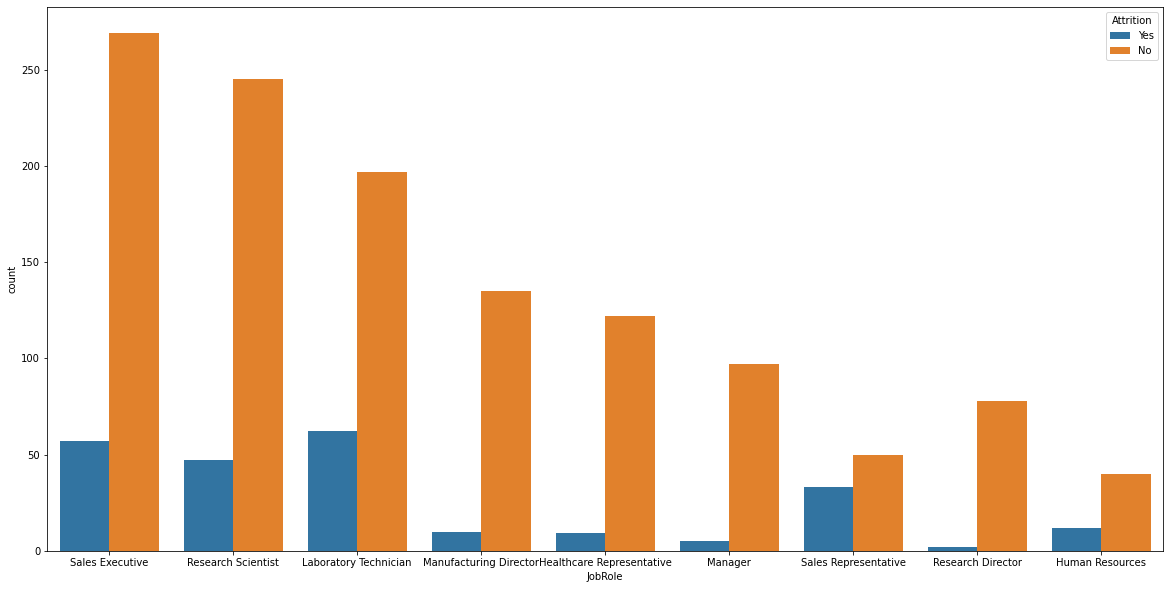

In [ ]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole',hue='Attrition',data=data1)
plt.xlabel('JobRole',fontsize=10)

* There are less no. of Research Director who leaves the company.
* Laboratory Technician , Sales Executive and Research Scientist are the top 3 job roles in which emloyees have thier Attrition "Yes".
* Apart from these it can also seen that there are more number of employees in Sales Executive job role.

# ANALYSIS ON CONTINUOS DATA W.R.T TARGET COLUMN

In [ ]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64" and len(data[column].unique())>= 10:   # for continuos features we use unique>=10
        
        numerical_col.append(column)

In [ ]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### GRAPHICAL REPRESENTATION OF CONTINUOS DATA

In [ ]:
data2=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

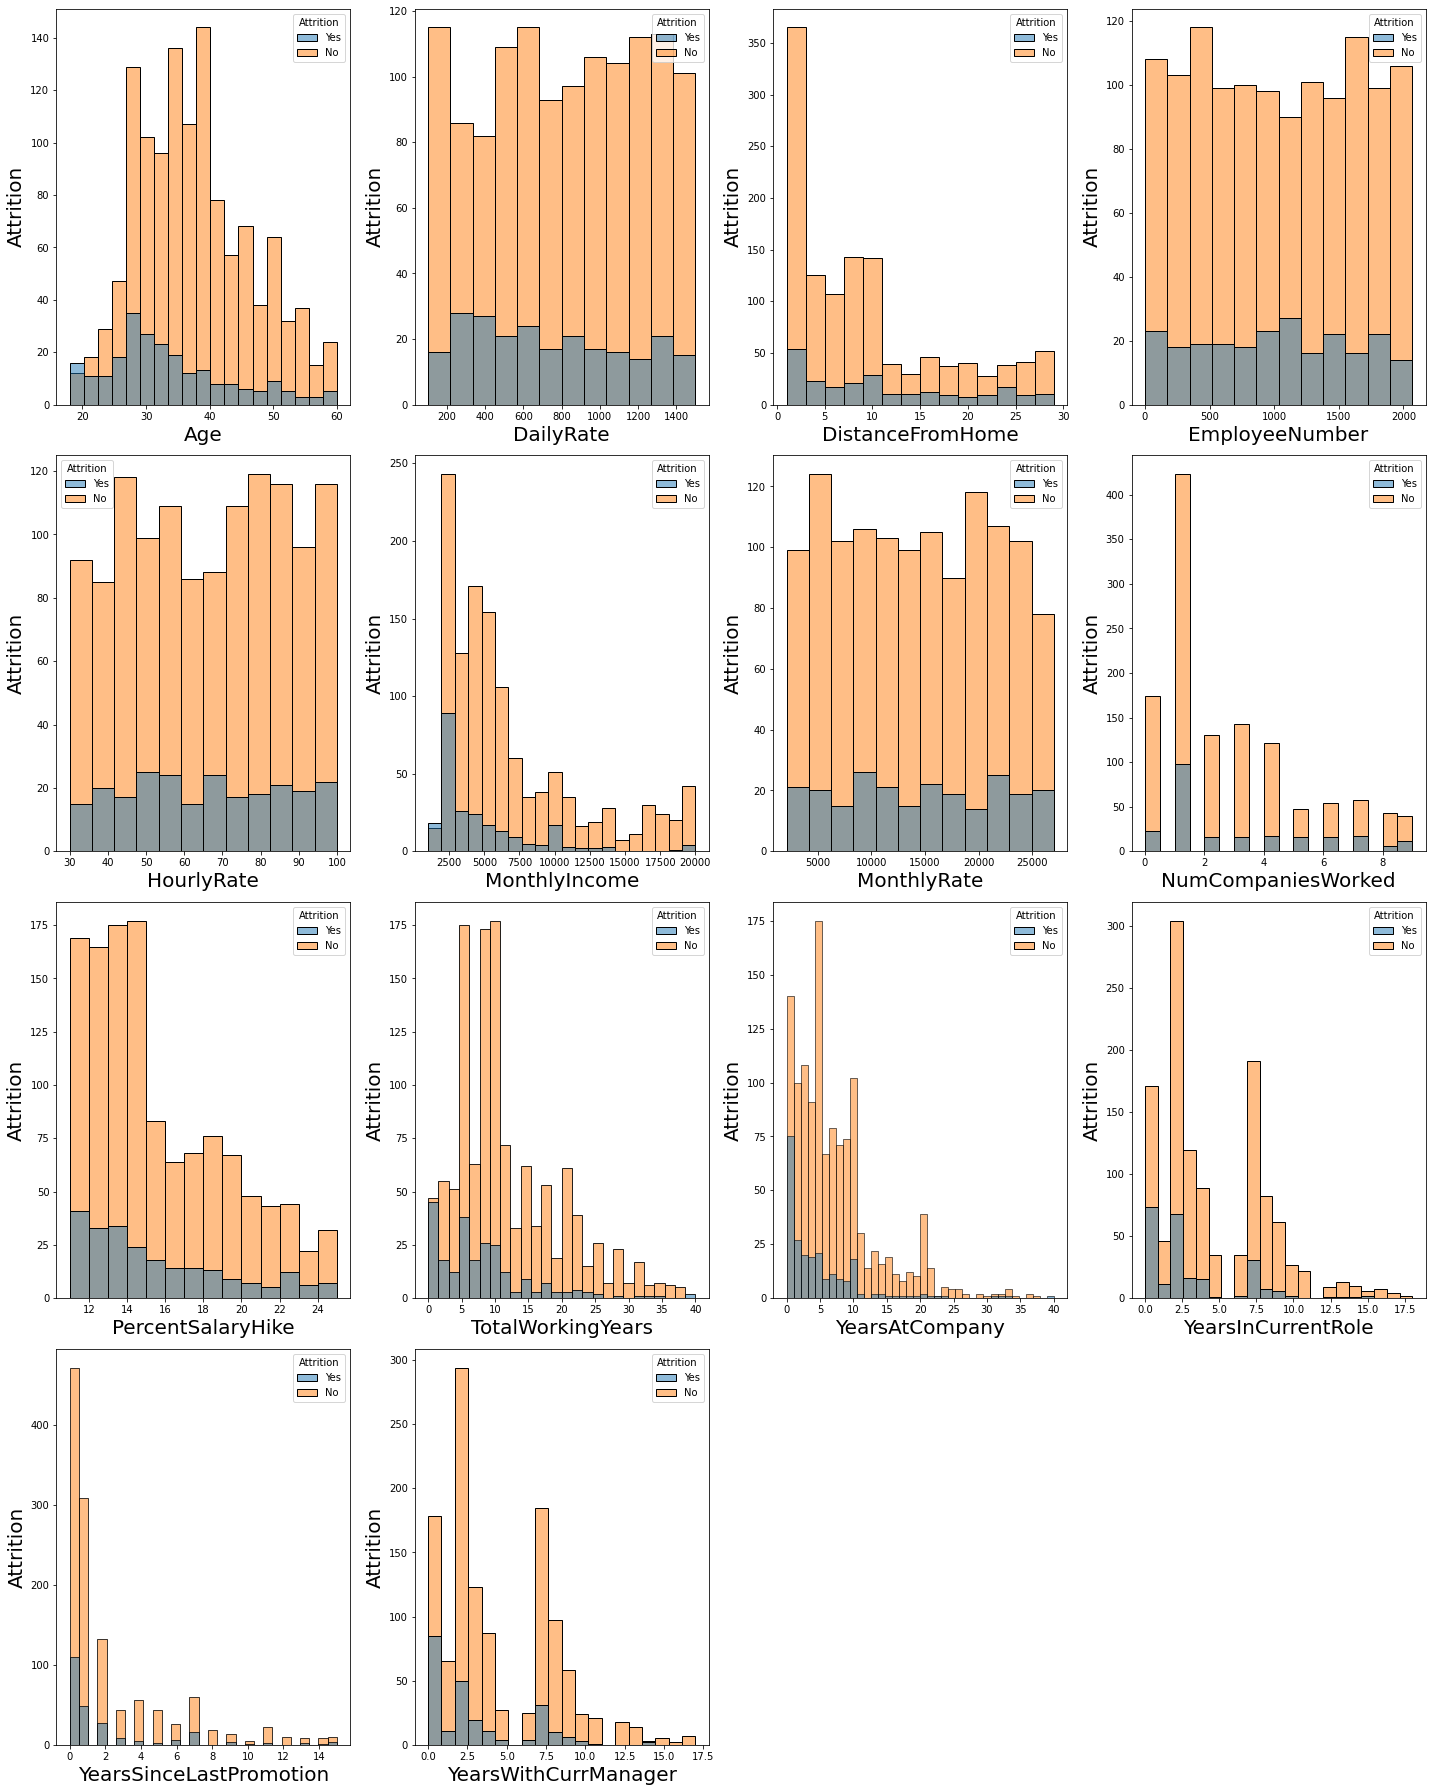

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### 1. IMPACT OF AGE ON ATTRITION

* Employees in age of 25 to 35 are more likey to leave the job.
* After 35 age , the distribution tells us that " Higher the Age Lesser will be Attrition.

### 2. DISTANCE FROM HOME AND ATTRITION

* Employees who has distance range of 0 - 10 km , are more likely to leave the job.


### 3. HOW MONTHLY INCOME GIVES TRENDS W.R.T ATTRITION

* Higher the Monthly Income give rise to less Attrition ( means Attrition " No " )
* Employees who have their Income aprox. 2500 are more likely to quit their job,because 2500 is the least range of income.

### 4. IMPACT OF NO. OF COMPANIES WORKED 

* Only that Employees(no. of emp. = 100) who worked with 1 company before have most  Attririon (Attrition " Yes "), rest have similiar data .

### 5. HOW SALARY HIKE IS IMPACTING THE ATTRITION

* Higher the salary prcentage hike , Lesser the Attririon (" No").

### 6. YEARS AT THE COMAPNY 

* Freshers have higher data of  " Attrition Yes " that is of 75 no. of workers.
* Apart from this Employees who ranges from 1 to 10 year working on this company are also likely to quit thier job.


### 7. YEARS WITH CURRENT MANAGER AND ATTRITION

* Employees who have 10 years or more  of relationship with their Manager have minor Attrition.

# ANALYSIS  OF  DISCRETE  DATA  W.R.T  TARGET  COLUMN

In [ ]:
discrete_col = []
for column in data.columns:
    if data[column].dtype == "int64" and len(data[column].unique()) <= 10:
        discrete_col.append(column)

In [ ]:
data3=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

## GRAPHICAL REPRESENTATION

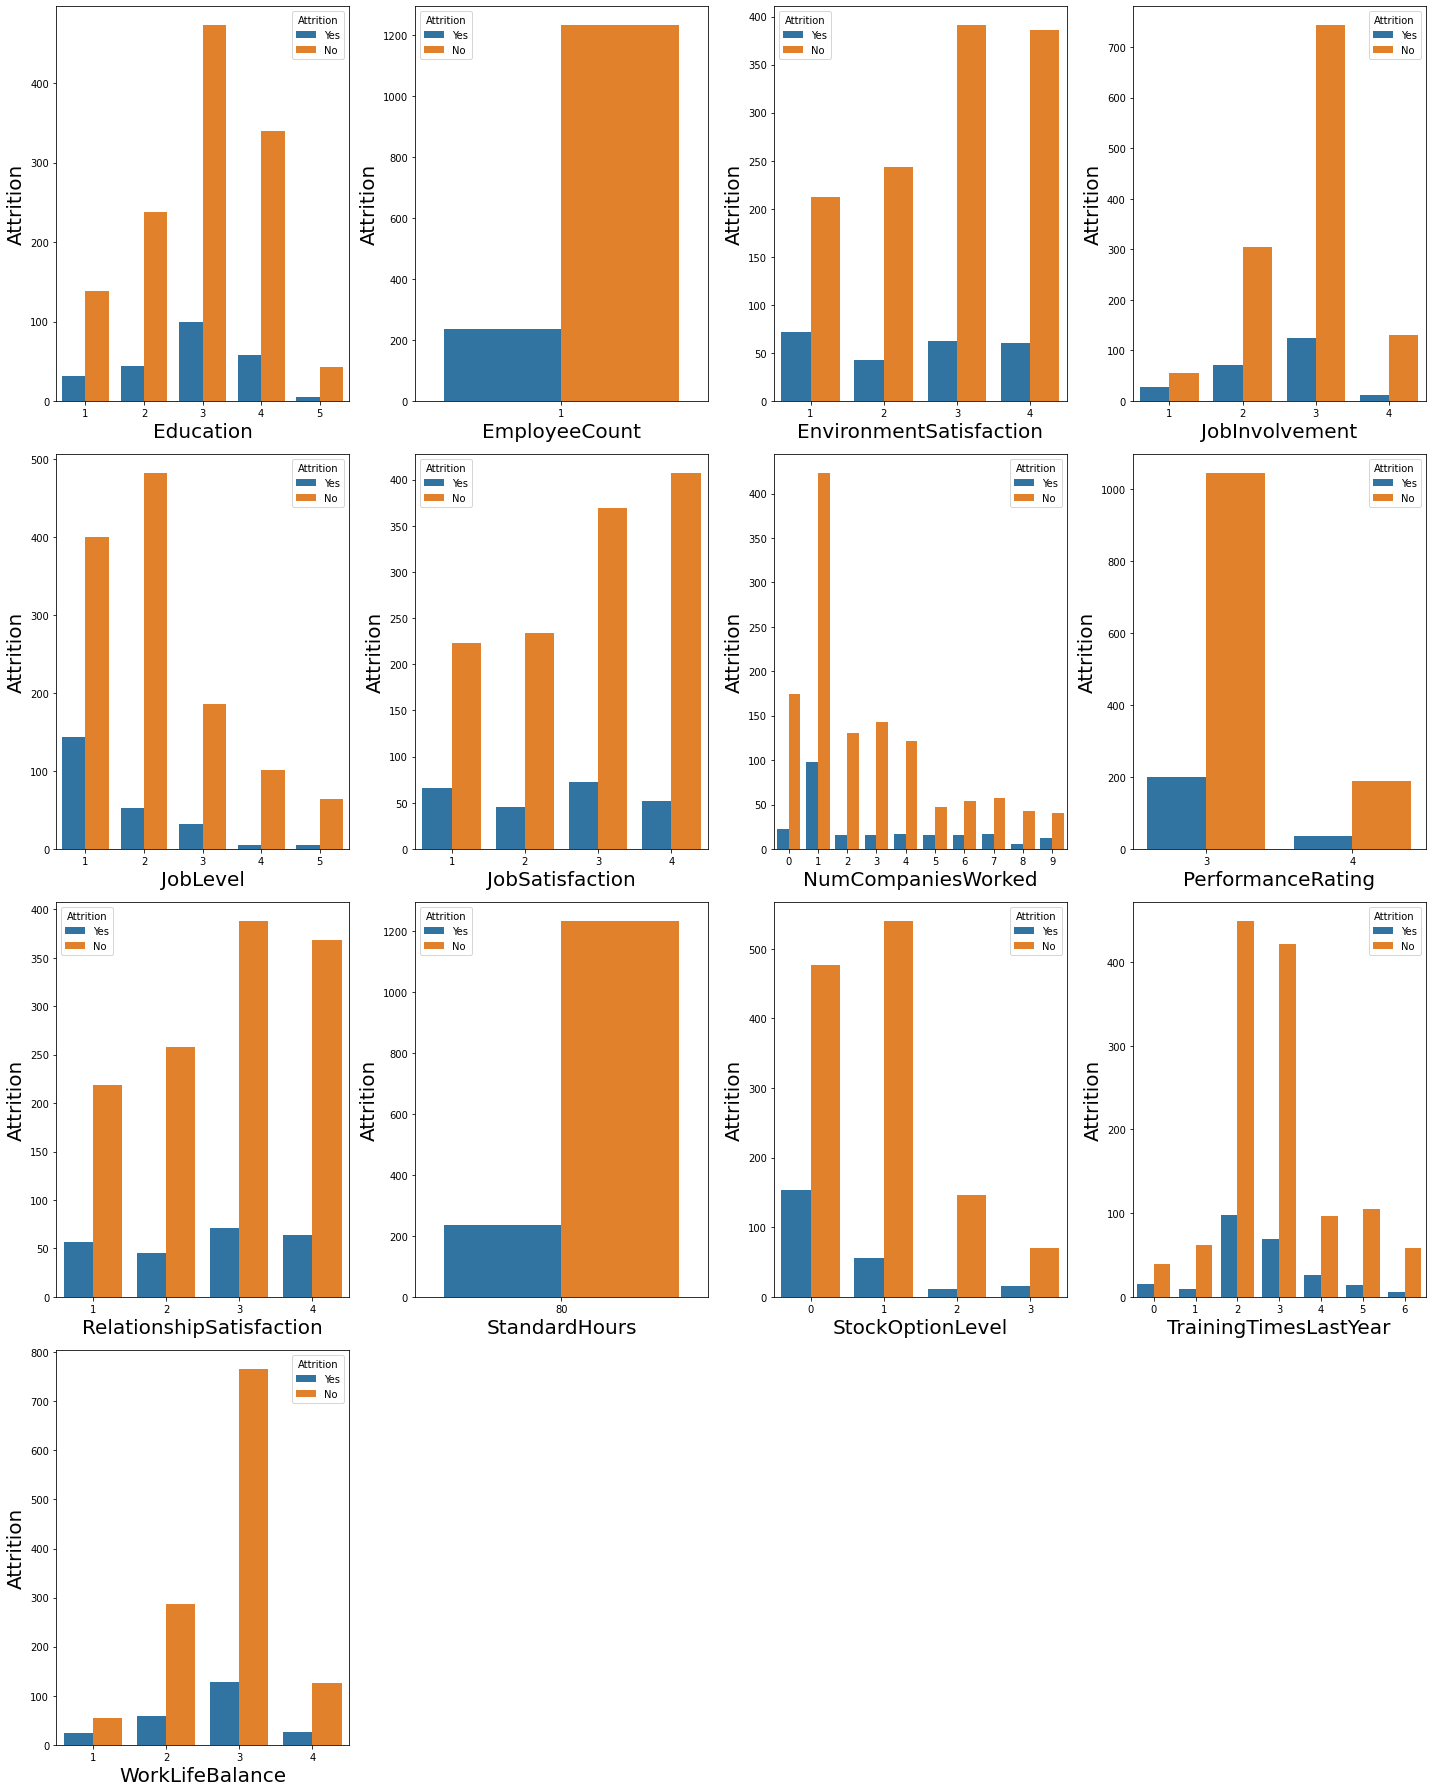

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data3[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### 1. IMPACT OF EMVIRONMENT AND JOB SATISFACTION   ON ATTRITION

* Increase in rate of Environment as well as Job Satisfaction gives rise to increase in Attrition " No "(means not willing to quit).


### 2. HOW JOB LEVEL IS AFFECTING ATTRITION

* Increase in job level , Decrease in chances of leaving the company for Employees.

### 3. JOB INVOLVEMENT IMPACTING ON ATTRITION

* The employees who involved in job more than sufficient are more likely to quit.
* Somehow,there are some emp. who are not involved fully in there job but they are also like to quit.

### 4 . IMPACT OF STOCK OPTION LEVEL ON ATTRITION

* For the employees who're  not having stock option are likely to quit.

### 5. PERFORMANCE RATING AND ATTRITION

* On an average , most of employees are moderately performed.
* However employes having less Performance rating are more likely to quit .